# Sclearn test
by Grigory Sharkov

Objective:  

1. Please create a Logistic Regression model against the dataset < UCI_Credit_Card.csv> using all possible independent variable, dependent variable is: default.payment.next.month. (Please split into Training-80% and Test – 20% Randomly and test your training model onto test data).
2. Visualize the Prediction vs Actual, and also the basic Test output including, but not limit to T-Test, P-value etc. 


# 1. Load and explore data

In [201]:
import pandas as pd
import numpy as np

In [202]:
import pandas as pd
path = r"..\data\uci_credit_card.csv"
raw_data = pd.read_csv(path, sep=";", index_col="ID")
raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [203]:
from ydata_profiling import ProfileReport
profile = ProfileReport(raw_data, title="Pandas Profiling Report")

In [204]:
profile.to_file(r"..\html\uci_credit_card_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Observations:
* 30K rows, 35 of them are duplicate, need to drop
* PAY_X variables are highly correlated, for simplicity, will use PCA for them
* PAY_AMT columns are highly skewed to the left, which is usual for amount data. Better use their log amount instead (possible scaling needed)
* BILL_AMT columns are skewed to the right, but contain negative values, therefore need to scaled differently (let's try taking a square root of the absolute amount)


# 2. Preprocess data
2 actions to be done

1. drop duplicates
2. convert amount columns to log

Other actions can will be performed at the modeling step

In [205]:

from xml.etree.ElementPath import prepare_predicate


preprocessed_data = raw_data.copy(deep=True).drop_duplicates()
pay_cols = [x for x in raw_data.columns if "PAY_AMT" in x] + ["LIMIT_BAL",]
bill_cols = [x for x in raw_data.columns if "BILL_AMT" in x]

for col in pay_cols:
    preprocessed_data[col] = preprocessed_data[col].map(lambda x: np.log(x+1))

for col in bill_cols:
    preprocessed_data[col] = preprocessed_data[col].map(lambda x: np.sqrt(x+1) if x >= 0 else -np.sqrt(-x))

preprocessed_data


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,9.903538,2,2,1,24,2,2,-1,-1,-2,...,1.000000,1.000000,1.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1
2,11.695255,2,2,2,26,-1,2,0,0,0,...,57.210139,58.787754,57.113921,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1
3,11.407576,2,2,2,34,0,0,0,0,0,...,119.716331,122.266103,124.699639,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
4,10.819798,2,2,1,37,0,0,0,0,0,...,168.270615,170.176379,171.895317,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
5,10.819798,1,2,1,57,-1,0,-1,0,0,...,144.710055,138.372685,138.318473,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,12.301387,1,3,1,39,0,0,0,0,0,...,296.656367,176.742751,126.415980,9.047939,9.903538,8.517993,8.022241,8.517393,6.908755,0
29997,11.918397,1,3,2,43,-1,-1,-1,-1,0,...,94.762862,72.048595,1.000000,7.516433,8.168203,9.104869,4.867534,0.000000,0.000000,0
29998,10.308986,1,2,2,37,4,3,2,-1,0,...,144.495675,143.467766,139.133030,0.000000,0.000000,9.998843,8.343078,7.601402,8.039480,1


In [206]:
profile = ProfileReport(preprocessed_data, title="Pandas Profiling Report")
profile.to_file(r"..\html\uci_credit_card_preprocessed_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Train & Test split
Since the dataset is somewhat imbalanced, I wand to make sure that both sets would have the same ratio of default clients, so rather than using a simple train test split I will be using stratified split.  
I will be splitting the whole data into train and test. The train will be used to do all experiments, whereas the test will be used for the final evaluation. Let's use 

In [216]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    preprocessed_data,
    test_size=.2,
    random_state=20230302,
    stratify=preprocessed_data["default.payment.next.month"].T
)
x_train = train.drop("default.payment.next.month", axis=1)
y_train = train["default.payment.next.month"]

x_test = test.drop("default.payment.next.month", axis=1)
y_test = test["default.payment.next.month"]
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
955,11.608245,2,2,1,46,-1,-1,-1,-1,-1,...,41.472883,328.012195,328.543757,7.674153,7.678789,7.450080,11.586102,8.517393,8.160804,0
562,12.793862,2,2,2,52,-2,-2,-2,-2,-2,...,31.622777,30.740852,-1.732051,7.710653,0.000000,6.913737,6.855409,0.000000,6.672033,0
12910,12.468441,2,1,2,31,0,0,0,0,0,...,357.204423,331.884016,335.208890,8.853808,8.331105,8.987322,8.294300,8.294300,8.517393,0
6969,10.819798,1,2,2,25,0,0,2,0,0,...,93.364876,94.482803,95.545801,7.496097,6.685861,6.216606,6.216606,6.216606,5.993961,1
11746,11.608245,2,1,1,37,-1,-1,0,0,0,...,224.541756,219.303443,58.223707,10.902298,8.794976,5.993961,8.294300,7.479864,0.000000,1


In [217]:
train_stats = y_train.value_counts()/len(train)
test_stats = y_test.value_counts()/len(test)
print(f"Distribution of target variable in train set:\n{train_stats}")
print(f"\nDistribution of target variable in train set:\n{test_stats}")

Distribution of target variable in train set:
0    0.778742
1    0.221258
Name: default.payment.next.month, dtype: float64

Distribution of target variable in train set:
0    0.778742
1    0.221258
Name: default.payment.next.month, dtype: float64


# 4. Modeling
## 4.1 Baseline model
we fit a simple logistic regression model to get the baseline for further comparisons. Since we have an imbalanced dataset, I will be using ROC AUC parameter as the main metric for evaluation of models

In [218]:
SCALABLE_NUMERIC_COLUMNS = [
    'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

NON_SCALABLE_NUMBERIC_COLUMN = [
    'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
]

CATEGORIC_COLUMN = [
    'SEX', 'EDUCATION', 'MARRIAGE'    
]

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix

def plot_conf_matrix(conf_matrix: confusion_matrix, title: str = None) -> plt:
    """
    function plots a confusion matrix

    Args:
        confusion_matrix: matrix to be plotted
        title: a caption assigned to the title

    Returns:
        a plt object ready to be plotted
    """
    if not title:
        title = 'Confusion Matrix'

    fig, ax = plt.subplots(
        figsize=(5, 5),
    )
    ax.set_xlabel("Predictions")
    ax.set_ylabel("True values")
    ax.set_title(title)
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.show()


def evaluate_model(pipeline: Pipeline, x_test: pd.DataFrame, y_test: pd.Series, title: str) -> None:
    """
    function evaluates a model performance based on given data and compares it with the provided labels
    
    Args:
        pipeline: trained model, used to generate predictions
        x_test: dataframe with the input data to be used to generate predictions
        y_test: true labels
        title: string to be added to the caption

    Returns:
        none, the function generates and shows a plot
    """

    y_pred = pipeline.predict(x_test)
    plot_conf_matrix(
        conf_matrix=confusion_matrix(y_test, y_pred),
        title=title + "\n"\
            + f"ROC AUC score is {roc_auc_score(y_test, y_pred):.4f}"
    )
    

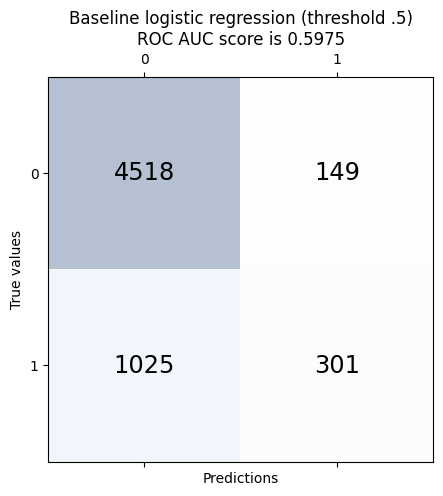

In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

basic_preprocessor = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), CATEGORIC_COLUMN),
        ("column_selector", "passthrough", NON_SCALABLE_NUMBERIC_COLUMN + SCALABLE_NUMERIC_COLUMNS),
    ]
)
regression = LogisticRegression(max_iter=10000)
base_pipeline = Pipeline(
    steps=[
        ("preprocessor", basic_preprocessor),
        ("regression", regression),
    ]
)

base_pipeline.fit(x_train, y_train)
evaluate_model(base_pipeline, x_test, y_test, "Baseline logistic regression (threshold .5)")


## 4.2 Alternative models
### 4.2.1 Pca and scaling
As mentioned above we have a decent amout of correlated features, which we would like to avoid in logistic regression models 2 steps can be undertaken to improve the situation:
1. scaling skewed features
2. replacing correlated features with principal components

Additional modification added at this stage will be an attempt to address the imbalance problem. There are multiple ways to addres it, like under/oversampling or SMOTE. For time simplicity, I would use a standard class_weight feature available in sklear, since quite often its performance remains pretty robust.

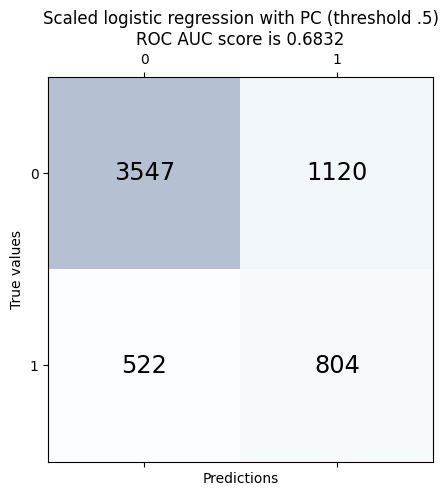

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion

preprocessing_transformer = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), SCALABLE_NUMERIC_COLUMNS),
        ("encoder", OneHotEncoder(), CATEGORIC_COLUMN),
        ("column_selector", "passthrough", NON_SCALABLE_NUMBERIC_COLUMN),
    ]
)

scaled_pipeline = Pipeline(
    steps=[
        ("preprocessing_transformer", preprocessing_transformer),
        ("composer", PCA(15)),
        ("regression_classifier", LogisticRegression(max_iter=50000, class_weight="balanced")),
    ]
)

scaled_pipeline.fit(x_train, y_train)
evaluate_model(scaled_pipeline, x_test, y_test, "Scaled logistic regression with PC (threshold .5)")


### 4.3 Ploynomial transformation
From my experience in quite a few cases, logistic regression performance can be improved by performing polynomial transformations to the features:

instead of using:
$$ a, b $$
use: 
$$a^2, ab, b^2$$
if we talk about polynomial transformation with degree=2

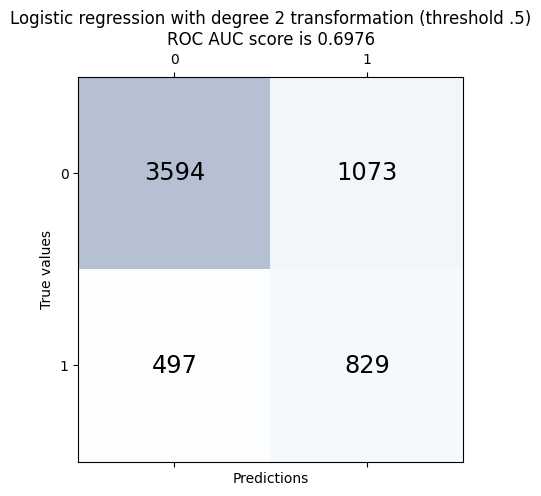

In [222]:
DEGREE = 2
polynomial_pipeline = Pipeline(
    steps=[
        ("preprocessing_transformer", preprocessing_transformer),
        ("composer", PCA(15)),
        (
            "polynomial_transformer", PolynomialFeatures(
                degree=DEGREE,
                include_bias=False
            )
        ),
        (
            "regression_classifier", LogisticRegression(
                max_iter=100000,
                solver="saga",
                class_weight="balanced",
            )
        ),
    ]
)

polynomial_pipeline.fit(x_train, y_train)
evaluate_model(polynomial_pipeline, x_test, y_test, f"Logistic regression with degree {DEGREE} transformation (threshold .5)")

The performance is slightly better, but this should be confirmed using cross validation to estimate the true variance of the test metric, which I would not do here to save some time...

# 5. Coefficients

we have different candidates of the models. Depending on l1 or l2 error cost we could make a valid choise of the model that would go into production. However the performance comes at a cost of interpretability. For simplicity reason, I will provide coefficients of the baseline model:

In [223]:
from scipy.stats import norm
def logit_pvalue(model, x):
    """
    Calculate z-scores for scikit-learn LogisticRegression.
    source: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p


In [225]:
variable_names = ["intercept",] + [*base_pipeline.named_steps["preprocessor"].get_feature_names_out()]
coefficients = [np.round(base_pipeline.named_steps["regression"].intercept_[0], 4)]\
    + [*np.round(base_pipeline.named_steps["regression"].coef_, 4)[0]]

importance = logit_pvalue(
    model=base_pipeline.named_steps["regression"],
    x=base_pipeline.named_steps["preprocessor"].transform(x_train)
)

pd.DataFrame(
    data={
        "variable": variable_names,
        "coefficient": coefficients,
        "Pr(>|z|)": np.round(importance, 5),
    }
)

C:\Users\A385637\AppData\Local\Temp\ipykernel_21920\4157188828.py:20: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diag(vcov))


,variable,coefficient,Pr(>|z|)
0,intercept,0.5203,1.00000
1,encoder__SEX_1,0.3091,1.00000
2,encoder__SEX_2,0.2083,1.00000
3,encoder__EDUCATION_0,-0.0458,1.00000
4,encoder__EDUCATION_1,0.5264,1.00000
5,encoder__EDUCATION_2,0.4520,1.00000
6,encoder__EDUCATION_3,0.4428,1.00000
7,encoder__EDUCATION_4,-0.2610,1.00000
8,encoder__EDUCATION_5,-0.5591,1.00000
9,encoder__EDUCATION_6,-0.0378,1.00000


Observations:
* categorical variables (sex, education and marriage) need level refactoring.
* pay amount increases chanses of default.
* higher ages slightly decreases chances of default.

# 6. Conclusions
There are a couple of tasks that were taken out of the scope of the current analysis:
* feature selection
* deeper feature engineering
* hyperparameter tuning
* development of challenger model

These task normally should be realized when working on such model. But due to time limietations have not been realized.
